In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [47]:
df = pd.read_csv('loan_approval_dataset.csv')

In [49]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [51]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

# Science there is no missing value I am starting Feature Engineering

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [56]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [58]:
df['loan_id'].dtypes

dtype('int64')

In [60]:
categorical_feature = []
numerical_feature = []
for i in df.columns:
    if df[i].dtypes == 'O':
        categorical_feature.append(i)
        print(f'unique values of {i} column is : {df[i].unique()}')
    else:
        numerical_feature.append(i)  
print(categorical_feature)
#print(numerical_feature)

unique values of  education column is : [' Graduate' ' Not Graduate']
unique values of  self_employed column is : [' No' ' Yes']
unique values of  loan_status column is : [' Approved' ' Rejected']
[' education', ' self_employed', ' loan_status']


In [62]:
discerate_column = [] 
for i in df.columns:
    if len(df[i].unique()) < 25:
        #print(df[i].value_counts())
        discerate_column.append(i) 
print(discerate_column)

[' no_of_dependents', ' education', ' self_employed', ' loan_term', ' loan_status']


## Droping unnecessary column

In [65]:
df.drop('loan_id',axis = 1, inplace  = True)

In [67]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


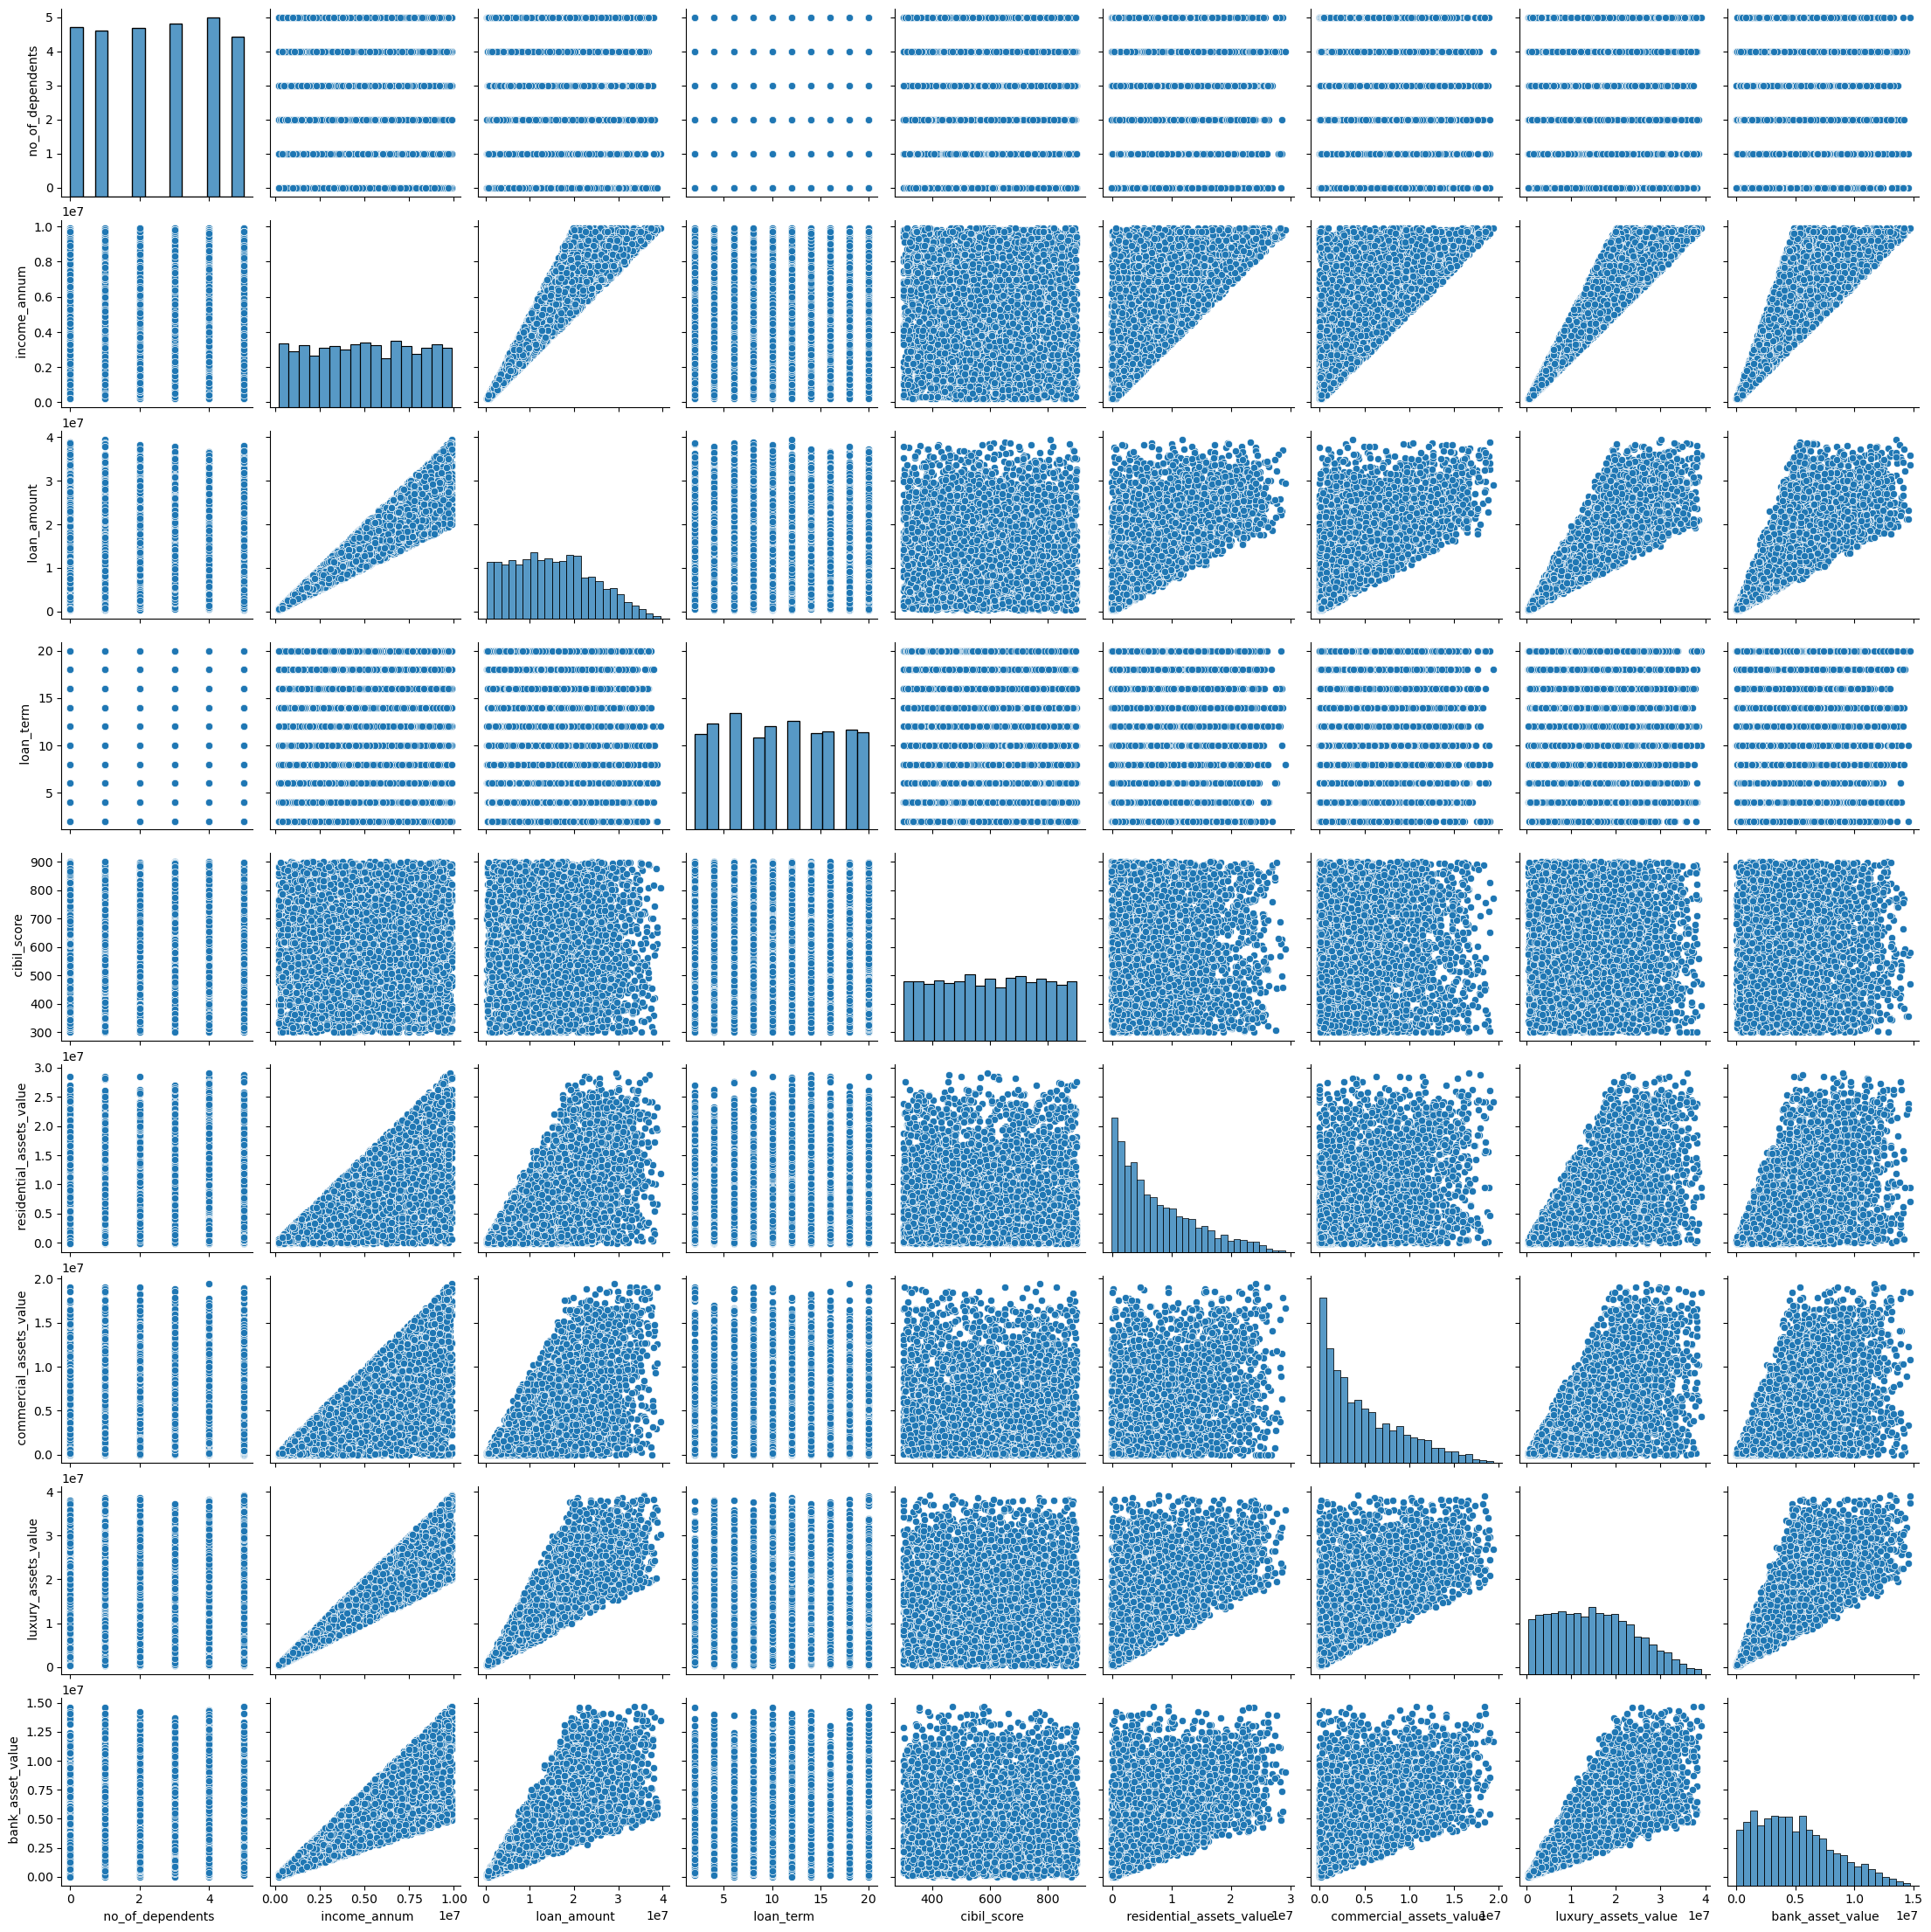

In [69]:
sns.pairplot(df)

In [70]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [73]:
df.columns =df.columns.str.strip()

In [75]:
df['loan_status'].value_counts()

loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [91]:
df['loan_status'] = df['loan_status'].str.strip()

In [95]:
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})


In [97]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [101]:
columns_x = []
for column in df.columns:
    columns_x.append(column.strip())
print(columns_x)
df.columns =columns_x

['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [103]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [105]:
## Dependent Feature 
x = df.drop('loan_status', axis = 1)
## independennt Feature 
y = df['loan_status']

In [107]:
x.shape

(4269, 11)

In [109]:
df['education']=df['education'].str.strip()


In [111]:
y.unique()

array([1, 0], dtype=int64)

In [113]:
x.shape

(4269, 11)

In [115]:
y.shape

(4269,)

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [119]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3201, 11), (1068, 11), (3201,), (1068,))

In [122]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select categorical and numerical features
cat_feature = x.select_dtypes(include="object").columns
num_feature = x.select_dtypes(exclude="object").columns

# Define transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_feature),
        ("cat", categorical_transformer, cat_feature)
    ]
)

# Optional: Create a pipeline if you need to include additional steps later
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

In [124]:
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.520659,0.118058,0.496938,1.581190,-1.023311,-0.149549,1.154576,0.052846,0.718137,1.0,0.0,1.0,0.0
1,-0.255200,0.295412,-0.130418,-0.519262,-0.007019,-0.423617,1.040339,0.281029,0.533716,1.0,0.0,1.0,0.0
2,0.336753,1.607828,0.518950,0.530964,-0.855854,-0.499747,2.571117,1.443676,0.502979,1.0,0.0,1.0,0.0
3,-0.255200,0.401824,0.904169,-0.519262,0.027627,0.383362,1.337356,0.715664,1.302140,1.0,0.0,1.0,0.0
4,0.336753,0.259941,-0.119411,0.180889,0.795621,0.642204,-0.124879,0.020248,1.056244,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,1.520659,-0.201178,0.210776,-1.569488,0.223956,0.474718,0.583391,-0.349191,0.472242,1.0,0.0,0.0,1.0
1064,0.336753,-1.442653,-1.363116,-1.219413,0.905334,-0.758590,-1.107318,-1.240192,-1.249030,1.0,0.0,1.0,0.0
1065,-0.255200,-0.272119,0.089707,0.530964,0.131566,0.352910,0.400611,0.194102,-0.142498,1.0,0.0,0.0,1.0
1066,1.520659,-0.378532,0.034676,0.180889,-0.480519,-1.139240,-0.993081,-0.338325,-0.449868,0.0,1.0,0.0,1.0


In [126]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.520659,0.898414,0.309832,0.180889,-0.855854,0.063615,-0.147727,0.932981,-0.081024,1.0,0.0,0.0,1.0
1,-1.439106,0.330883,0.849137,0.881040,-1.722012,0.718334,0.354917,0.270163,0.656663,0.0,1.0,1.0,0.0
2,-0.255200,1.111238,1.388443,0.881040,1.309541,0.611752,0.857560,1.172030,1.763195,0.0,1.0,0.0,1.0
3,-0.255200,0.827473,1.432468,-0.519262,-1.294707,2.195258,0.012205,0.237566,0.072661,0.0,1.0,0.0,1.0
4,-0.847153,-0.591356,-0.900854,-1.219413,-0.382354,-0.667234,-0.764607,-0.240532,-0.296183,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,-1.439106,-1.336241,-1.153997,0.881040,-0.405452,-0.652008,-0.901692,-1.240192,-1.279767,1.0,0.0,0.0,1.0
3197,1.520659,-1.620007,-1.473178,1.231115,-1.092604,-0.986980,-1.015929,-1.511838,-1.464189,0.0,1.0,0.0,1.0
3198,0.928706,1.253121,0.595994,0.881040,-0.873177,0.505170,1.291661,1.465408,0.134135,0.0,1.0,0.0,1.0
3199,-0.255200,0.685590,0.684044,0.180889,-0.341934,-0.575877,-0.833149,0.498346,1.425088,0.0,1.0,0.0,1.0


In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,mean_squared_error,r2_score, confusion_matrix

In [136]:
model = {
    "LogisticRegression": LogisticRegression(),
    'Random_forest' : RandomForestClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'KNN' : KNeighborsClassifier(),
    'Adaboost Classifier': AdaBoostClassifier(),
    'GreadientBoost' : GradientBoostingClassifier(),
    'XBG' : XGBClassifier()
}

for key,model in model.items():
    model.fit(x_train,y_train)
    
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    
    # for train data
    ac_score_train = accuracy_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    precision_train = precision_score(y_train, y_pred_train, average='weighted')
    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    conf_matrix_train = confusion_matrix(y_train, y_pred_train)
    #roc_train = roc_auc_score(y_train, y_pred_train)
    
    
    #FOr test data 
    ac_score_test = accuracy_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    precision_test = precision_score(y_test, y_pred_test, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    conf_test = confusion_matrix(y_test, y_pred_test)
   # roc_test = roc_auc_score(y_test, y_pred_test)
    
    ## Printing for train data 
    
    print(key)
    print('\n MOdel Preformance for traning dataset')
    print('Accurecy', ac_score_train)
    print('F1 Score',f1_train)
    print('Precision',precision_train)
    print('Recall',recall_train)
    print(conf_matrix_train)
    #print('Roc Auc Score',roc_train)
    
    #print('--------------------------------------\n')
    
    print('\nMOdel Preformance on Test DataSet')
    
    print('Accurecy', ac_score_test)
    print('F1 Score',f1_test)
    print('Precision',precision_test)
    print('Recall',recall_test)
    print(conf_test)
   # print('Roc Auc Score',roc_test)
    
    print('\n-----------------------------------')
    print('\n')

print("----------------Execution Finished----------------")

LogisticRegression

 MOdel Preformance for traning dataset
Accurecy 0.921899406435489
F1 Score 0.921935644904471
Precision 0.9219786633979162
Recall 0.921899406435489
[[1101  122]
 [ 128 1850]]

MOdel Preformance on Test DataSet
Accurecy 0.9054307116104869
F1 Score 0.9052453606557838
Precision 0.9051430870642511
Recall 0.9054307116104869
[[336  54]
 [ 47 631]]

-----------------------------------


Random_forest

 MOdel Preformance for traning dataset
Accurecy 1.0
F1 Score 1.0
Precision 1.0
Recall 1.0
[[1223    0]
 [   0 1978]]

MOdel Preformance on Test DataSet
Accurecy 0.9831460674157303
F1 Score 0.983136815112045
Precision 0.9831349949918575
Recall 0.9831460674157303
[[380  10]
 [  8 670]]

-----------------------------------


Decision Tree

 MOdel Preformance for traning dataset
Accurecy 1.0
F1 Score 1.0
Precision 1.0
Recall 1.0
[[1223    0]
 [   0 1978]]

MOdel Preformance on Test DataSet
Accurecy 0.9840823970037453
F1 Score 0.98407804531118
Precision 0.9840755517169957
Recall 0.

In [ ]:
model